<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T19_NLP_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Gustavo Rocha">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

## <h1 align=left><font size = 6, style="color:rgb(200,0,0)">Fundamentos de NLP</font></h1>
<hr>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gráficos com palavras

Neste primeiro exercício/exemplo vamos aprender a fazer gráficos com palavras retomando um exemplo da primeira aula.



Continuaremos a trabalhar nesse primeiro exemplo com os textos do Shakeaspeare.

In [38]:
!wget 'https://www.gutenberg.org/files/1112/1112.txt' -O RomeoandJuliet.txt

--2021-11-16 20:24:06--  https://www.gutenberg.org/files/1112/1112.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179410 (175K) [text/plain]
Saving to: ‘RomeoandJuliet.txt’

RomeoandJuliet.txt  100%[===================>] 175.21K  --.-KB/s    in 0.06s   

2021-11-16 20:24:09 (2.87 MB/s) - ‘RomeoandJuliet.txt’ saved [179410/179410]



In [39]:
!pip install wordcloud

In [40]:
from pathlib import Path
text = Path('RomeoandJuliet.txt').read_text()

In [41]:
from wordcloud import WordCloud   

In [42]:
wordcloud = WordCloud(width=2000, height=1000, 
    colormap='prism', background_color='white')

In [43]:
wordcloud = wordcloud.generate(text)

In [44]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

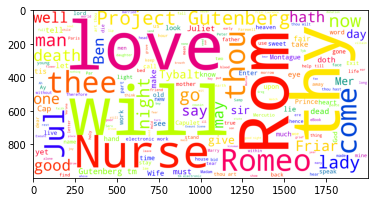

In [45]:
plt.imshow(wordcloud)

## Repita o exercício acima para o texto do Hamlet

# Frequência com Gráficos de Barras

In [46]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
%matplotlib inline
from pathlib import Path
blob = TextBlob(Path('RomeoandJuliet.txt').read_text())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [48]:
items = blob.word_counts.items()

In [49]:
items = [item for item in items if item[0] not in stop_words]

In [50]:
from operator import itemgetter

In [51]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [52]:
top20 = sorted_items[0:21]

In [53]:
import pandas as pd

In [54]:
df = pd.DataFrame(top20, columns=['word', 'count'])  

In [55]:
df

,word,count
0,thou,278
1,thy,164
2,rom,163
3,romeo,162
4,nurse,150
5,love,148
6,thee,138
7,jul,117
8,shall,112
9,come,99


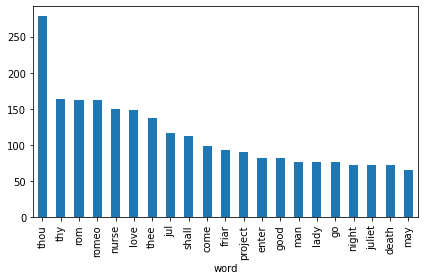

In [56]:
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

Repita o Exercício acima para o texto do Hamlet

# Análise de Sentimento

Use a biblioteca textblob para fazer análise de sentimento nas seguintes sentenças#

1 - A grama da vizinho é sempre mais verde. -> The grass is always greener on the other side of the fence.
2 - Cada um por si e Deus por todos. -> Every man for himself (and the devil take the hindmost).
3 - Diga com quem andas e te direi quem és. ->	Birds of a feather flock together.


In [57]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
text = 'The grass is always greener on the other side of the fence. Every man for himself (and the devil take the hindmost). Birds of a feather flock together. '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
#crie o blob
blob = TextBlob(text)

In [59]:
#mostre cada uma das sentenças
blob.sentences

[Sentence("The grass is always greener on the other side of the fence."),
 Sentence("Every man for himself (and the devil take the hindmost)."),
 Sentence("Birds of a feather flock together.")]

In [60]:
#calcule o score de sentimento (polarity e subjectivity) para cada sentença
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


# Lematização com a spaCy

No exercício abaixo, use as sentenças do exercício anterior para lematizar. 

In [61]:
import spacy
nlp = spacy.load("en_core_web_sm") 
doc = nlp("") # substitua seu texto aqui

In [62]:
for token in doc:
  print(token.text,token.lemma_)

# POS Tagging com spaCy

Utilize as mesmas sentenças do exercício anterior para fazer POS Tagging. Interprete o significado e verifique se estão de acordo com o esperado. 

In [63]:
doc = nlp("") #seu texto vai aqui

for token in doc:
    print(token.text, token.lemma_,token.tag_)

# Vetorizando com o TF_IDF

Fique tranquilo. Neste exercício vamos apenas mostrar como fazer TF-IDF no Python. Se preocupe em acompanhar a sequencia de raciocínio aqui. Mais uma vez iremos utilizar as 3 sentenças anteriores: 


In [64]:
import pandas as pd 
df =pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/main/data/cuisine_data.csv')

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
Document1= "The grass is always greener on the other side of the fence."
Document2= " Every man for himself (and the devil take the hindmost)."
Document3= "Birds of a feather flock together."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

['The grass is always greener on the other side of the fence.', ' Every man for himself (and the devil take the hindmost).', 'Birds of a feather flock together.']


In [67]:
vectorizer = TfidfVectorizer()

In [68]:
X = vectorizer.fit_transform(Doc)

In [69]:
analyze = vectorizer.build_analyzer()

print('Document 1',analyze(Document1))

print('Document 2',analyze(Document2))

print('Document 3',analyze(Document3))

print('Document transform',X.toarray())

Document 1 ['the', 'grass', 'is', 'always', 'greener', 'on', 'the', 'other', 'side', 'of', 'the', 'fence']
Document 2 ['every', 'man', 'for', 'himself', 'and', 'the', 'devil', 'take', 'the', 'hindmost']
Document 3 ['birds', 'of', 'feather', 'flock', 'together']
Document transform [[0.26934719 0.         0.         0.         0.         0.
  0.26934719 0.         0.         0.26934719 0.26934719 0.
  0.         0.26934719 0.         0.20484548 0.26934719 0.26934719
  0.26934719 0.         0.61453645 0.        ]
 [0.         0.311383   0.         0.311383   0.311383   0.
  0.         0.         0.311383   0.         0.         0.311383
  0.311383   0.         0.311383   0.         0.         0.
  0.         0.311383   0.4736296  0.        ]
 [0.         0.         0.46735098 0.         0.         0.46735098
  0.         0.46735098 0.         0.         0.         0.
  0.         0.         0.         0.35543247 0.         0.
  0.         0.         0.         0.46735098]]


In [70]:
print(vectorizer.get_feature_names_out())

['always' 'and' 'birds' 'devil' 'every' 'feather' 'fence' 'flock' 'for'
 'grass' 'greener' 'himself' 'hindmost' 'is' 'man' 'of' 'on' 'other'
 'side' 'take' 'the' 'together']


In [71]:
len((vectorizer.get_feature_names_out()))

22

In [72]:
import pandas as pd 
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [73]:
df

,always,and,birds,devil,every,feather,fence,flock,for,grass,greener,himself,hindmost,is,man,of,on,other,side,take,the,together
0,0.269347,0.000000,0.000000,0.000000,0.000000,0.000000,0.269347,0.000000,0.000000,0.269347,0.269347,0.000000,0.000000,0.269347,0.000000,0.204845,0.269347,0.269347,0.269347,0.000000,0.614536,0.000000
1,0.000000,0.311383,0.000000,0.311383,0.311383,0.000000,0.000000,0.000000,0.311383,0.000000,0.000000,0.311383,0.311383,0.000000,0.311383,0.000000,0.000000,0.000000,0.000000,0.311383,0.473630,0.000000
2,0.000000,0.000000,0.467351,0.000000,0.000000,0.467351,0.000000,0.467351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355432,0.000000,0.000000,0.000000,0.000000,0.000000,0.467351


# Repita o Processo agora para um novo conjunto de sentenças 

In [76]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/main/data/cuisine_data.csv')

In [77]:
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


In [78]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [79]:
ingredientes = df.cuisine_description.to_list()

In [80]:
X = vectorizer.fit_transform(ingredientes)

In [81]:
print('Document transform',X.toarray())

Document transform [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
print(vectorizer.get_feature_names_out())

['00' '10' '100' ... 'ziti' 'zucchini' 'épices']


In [83]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [84]:
df

,00,10,100,14,15,25,33,40,43,95,96,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,ackee,acorn,acting,activ,active,added,adobo,adzuki,agar,agave,age,aged,ahi,aioli,ajinomoto,ajwain,aka,alaskan,albacore,...,woods,worcestershire,world,wrappers,wraps,xanthan,xuxu,yaki,yakisoba,yam,yams,yardlong,yeast,yellow,yellowfin,yellowtail,yoghurt,yogurt,yolk,yolks,yoplait,york,young,yu,yuca,yucca,yukon,yum,yuzu,yuzukosho,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.274719,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.221450,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.193919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218676,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
39770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341027,0.0,0.0,0.0,0.0
39771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
39772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Desafio: Ganhe 0,5 ponto na N2

Crie seu próprio algoritmo TF-IDF se apoiando no notebook da primeira aula do curso. Olhe o exercício 7 e 8 do primeiro notebook deste curso. 